In [37]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta

def week_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, max(movienm), avg(mrank), min(mrank),avg(salesshare),max(salesshare),avg(audicnt), max(audicnt),avg(scrncnt), max(scrncnt), avg(showcnt), max(showcnt),max(audiacc) 
    from boxoffice  
    where  opendt +13 >= dailydate2 and dailydate2 < TO_DATE('19/01/01', 'YY/mm/dd')
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result


def max_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd,  max(audiacc)
    from boxoffice 
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

def nation_dataframe():
    db = DbConn()
    
    select_query = """
    select max(moviecd),  max(nations)
    from moviedetail
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

# print(week_dataframe())
# print(max_dataframe())
print(nation_dataframe())


누적 작업 완료. -----
[(19720061, '홍콩'), (19818004, '영국'), (19880001, '일본'), (19890291, '미국'), (19900204, '미국'), (19900335, '미국'), (19910247, '미국'), (19950327, '미국'), (19960126, '미국'), (19970099, '미국'), (19980074, '미국'), (19990050, '한국'), (19990140, '이탈리아'), (19990220, '미국'), (19990303, '미국'), (20000067, '일본'), (20010238, '미국'), (20010291, '미국'), (20020168, '일본'), (20020186, '미국'), (20020222, '미국'), (20030003, '한국'), (20030404, '미국'), (20040525, '미국'), (20040526, '미국'), (20040695, '미국'), (20040734, '미국'), (20040756, '일본'), (20041524, '일본'), (20050082, '미국'), (20060127, '독일'), (20060204, '일본'), (20060347, '스페인'), (20068576, '한국'), (20068659, '일본'), (20070083, '영국'), (20070454, '아일랜드'), (20070458, '일본'), (20070582, '미국'), (20070602, '일본'), (20071066, '대만'), (20078561, '일본'), (20080071, '미국'), (20080349, '미국'), (20081056, '미국'), (20090683, '미국'), (20090834, '미국'), (20098169, '미국'), (20100211, '한국'), (20110027, '이탈리아'), (20111009, '미국'), (20122021, '미국'), (20122787, '한국'), (20123501, '한국'), (201

In [38]:
import pandas as pd

df_nation_column_name = ['mnumber', 'mnation']
df_nation = pd.DataFrame(nation_dataframe(), columns=df_nation_column_name)
df_nation.tail()


누적 작업 완료. -----


,mnumber,mnation
1549,20199949,미국
1550,20199950,미국
1551,20199951,미국
1552,20199954,미국
1553,20199981,러시아


In [39]:
new_nation =[]
for i in df_nation['mnation']:
    if i in ['한국','미국','일본','중국','영국','프랑스']:
        new_nation.append(i)
    else :
        new_nation.append('기타국가')

df_nation['mnation'] = new_nation
df_nation.head()

,mnumber,mnation
0,19720061,기타국가
1,19818004,영국
2,19880001,일본
3,19890291,미국
4,19900204,미국


In [40]:
df_nation = pd.get_dummies(df_nation,columns=['mnation'])
df_nation.head()

,mnumber,mnation_기타국가,mnation_미국,mnation_영국,mnation_일본,mnation_중국,mnation_프랑스,mnation_한국
0,19720061,1,0,0,0,0,0,0
1,19818004,0,0,1,0,0,0,0
2,19880001,0,0,0,1,0,0,0
3,19890291,0,1,0,0,0,0,0
4,19900204,0,1,0,0,0,0,0


In [41]:
import pandas as pd

df_week_column_name = ['mnumber', 'mname','avg_rank', 'min_rank', 
                       'avg_dshare','max_dshare', 
                       'avg_dpeople','max_dpeople', 'avg_dscreen','max_dscreen',
                       'avg_dview','max_dview','sum_dpeople']
df_week = pd.DataFrame(week_dataframe(), columns=df_week_column_name)
df_week.tail()


첫주 작업 완료. -----


,mnumber,mname,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dpeople
1226,20189843,호두까기 인형과 4개의 왕국,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,433779
1227,20189861,더 포스트,8.818182,8,2.009091,3.0,9399.636364,17818,221.000000,281,454.636364,614,111760
1228,20189869,해피 투게더,9.600000,9,0.460000,0.6,2160.000000,3191,169.400000,240,244.400000,373,20989
1229,20189882,반딧불이 딘딘,9.000000,9,1.600000,1.7,5105.000000,5494,272.000000,274,332.000000,335,29414
1230,20189901,더 포리너,9.750000,9,2.025000,3.9,4963.250000,8178,150.750000,156,462.000000,547,35694


In [42]:
df_max_column_name = ['mnumber', 'sum_total_people']
df_max = pd.DataFrame(max_dataframe(), columns=df_max_column_name )
df_max.tail()

누적 작업 완료. -----


,mnumber,sum_total_people
1548,20199949,8991
1549,20199950,5234641
1550,20199951,471266
1551,20199954,8491
1552,20199981,143853


In [43]:
df = pd.merge(df_week,df_max, on='mnumber')

df = pd.merge(df,df_nation, on='mnumber')


df.tail()

,mnumber,mname,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,...,max_dview,sum_dpeople,sum_total_people,mnation_기타국가,mnation_미국,mnation_영국,mnation_일본,mnation_중국,mnation_프랑스,mnation_한국
1226,20189843,호두까기 인형과 4개의 왕국,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,...,1320,433779,481315,0,1,0,0,0,0,0
1227,20189861,더 포스트,8.818182,8,2.009091,3.0,9399.636364,17818,221.000000,281,...,614,111760,111760,0,1,0,0,0,0,0
1228,20189869,해피 투게더,9.600000,9,0.460000,0.6,2160.000000,3191,169.400000,240,...,373,20989,20989,0,0,0,0,0,0,1
1229,20189882,반딧불이 딘딘,9.000000,9,1.600000,1.7,5105.000000,5494,272.000000,274,...,335,29414,29414,0,0,0,0,1,0,0
1230,20189901,더 포리너,9.750000,9,2.025000,3.9,4963.250000,8178,150.750000,156,...,547,35694,35694,0,0,1,0,0,0,0


In [44]:
# df['sum_total_people'].describe()
print(df['sum_total_people'].quantile(q=0.9, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.75, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.5, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.25, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0, interpolation='nearest')
     )

a = df['sum_total_people'].quantile(q=0.9, interpolation='nearest')
b = df['sum_total_people'].quantile(q=0.75, interpolation='nearest')
c = df['sum_total_people'].quantile(q=0.5, interpolation='nearest')
d = df['sum_total_people'].quantile(q=0.25, interpolation='nearest')
e = df['sum_total_people'].quantile(q=0, interpolation='nearest')
# 10%
# 25%
# 50%
# 75%
# 100%

2607123 679870 129584 30303 810


In [45]:
score_list = []
for i in df['sum_total_people']:
    if i >= a:
        score_list.append('A')
    elif i >= b:
        score_list.append('B')
    elif i >= c:
        score_list.append('C')
    elif i >= d:
        score_list.append('D')
    else :
        score_list.append('F')

        
df['score'] = score_list
df['score'].head()

0    D
1    C
2    C
3    C
4    A
Name: score, dtype: object

In [46]:
df.groupby('score')['score'].count()

score
A    124
B    185
C    307
D    307
F    308
Name: score, dtype: int64

In [47]:
X = df.drop(['mnumber', 'mname','sum_total_people','score'], axis=1)
X.tail()

,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dpeople,mnation_기타국가,mnation_미국,mnation_영국,mnation_일본,mnation_중국,mnation_프랑스,mnation_한국
1226,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,433779,0,1,0,0,0,0,0
1227,8.818182,8,2.009091,3.0,9399.636364,17818,221.000000,281,454.636364,614,111760,0,1,0,0,0,0,0
1228,9.600000,9,0.460000,0.6,2160.000000,3191,169.400000,240,244.400000,373,20989,0,0,0,0,0,0,1
1229,9.000000,9,1.600000,1.7,5105.000000,5494,272.000000,274,332.000000,335,29414,0,0,0,0,1,0,0
1230,9.750000,9,2.025000,3.9,4963.250000,8178,150.750000,156,462.000000,547,35694,0,0,1,0,0,0,0


In [48]:
Y=df['score']

In [49]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [50]:
model = RandomForestClassifier(n_estimators=10, random_state=999)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

In [51]:
model.score(X_train,y_train)

0.9953542392566783

In [52]:
model.score(X_test,y_test)

0.9378378378378378

In [53]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[F]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[F]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[F]
True[A],30,2,1,0,0
True[B],10,52,2,0,0
True[C],0,0,83,2,0
True[D],0,0,2,91,3
True[F],0,0,0,1,91


In [55]:
feat_labels = X.columns
feat_labels

Index(['avg_rank', 'min_rank', 'avg_dshare', 'max_dshare', 'avg_dpeople',
       'max_dpeople', 'avg_dscreen', 'max_dscreen', 'avg_dview', 'max_dview',
       'sum_dpeople', 'mnation_기타국가', 'mnation_미국', 'mnation_영국', 'mnation_일본',
       'mnation_중국', 'mnation_프랑스', 'mnation_한국'],
      dtype='object')

 1) min_rank                       0.019971
 2) avg_dshare                     0.060680
 3) avg_dpeople                    0.120087
 4) avg_dscreen                    0.025408
 5) max_dshare                     0.109966
 6) max_dpeople                    0.206766
 7) avg_rank                       0.047712
 8) sum_dpeople                    0.272210
 9) mnation_프랑스                    0.000000
10) mnation_기타국가                   0.000262
11) avg_dview                      0.071158
12) mnation_한국                     0.002847
13) mnation_중국                     0.000000
14) max_dview                      0.045066
15) mnation_일본                     0.001122
16) mnation_영국                     0.000249
17) mnation_미국                     0.001881
18) max_dscreen                    0.014614


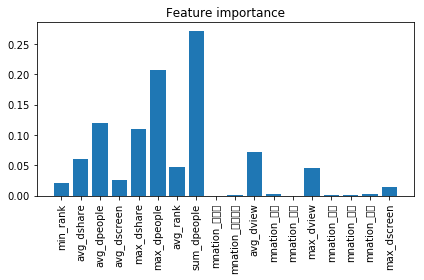

In [56]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances[::-1])
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()